In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import time
import matplotlib as mpl
import sys
from datetime import datetime
from time import mktime, strptime
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
#Jupyter notebook to generate Figure 3A, B, C in AFRICA_75K manuscript.
#Written by M Cotten, My VT Phan as part of the Wellcome Trust funded AFRICO19 project

In [2]:
#Import data
outprefix = "Africa_to_30Mar22_Ncounts"
df1 = pd.read_csv('Africa_All_bysubm_to29May22_plus_pangoB_countNs.csv', sep=",", na_values=['-'])
df1

,genome_id,N_count
0,EPI_ISL_2365915|Rwanda|2021-02-19|2021-06-01|N...,3
1,EPI_ISL_2365914|Rwanda|2021-04-03|2021-06-01|N...,3
2,EPI_ISL_2424136|Gabon|2021-02-09|2021-06-05|CE...,751
3,EPI_ISL_2424137|Gabon|2021-02-09|2021-06-05|CE...,615
4,EPI_ISL_2424138|Gabon|2021-02-19|2021-06-05|CE...,955
...,...,...
114243,EPI_ISL_12970514|Mauritius|2022-04-20|2022-05-...,262
114244,EPI_ISL_12970515|Mauritius|2022-04-20|2022-05-...,6
114245,EPI_ISL_12970516|Mauritius|2022-04-20|2022-05-...,1684
114246,EPI_ISL_12970517|Mauritius|2022-04-20|2022-05-...,3713


In [3]:
epidemic_month_dictionary ={"2020-03":1,
"2020-04":2,
"2020-05":3,
"2020-06":4,
"2020-07":5,
"2020-08":6,
"2020-09":7,
"2020-10":8,
"2020-11":9,
"2020-12":10,
"2021-01":11,
"2021-02":12,
"2021-03":13,
"2021-04":14,
"2021-05":15,
"2021-06":16,
"2021-07":17,
"2021-08":18,
"2021-09":19,
"2021-10":20,
"2021-11":21,
"2021-12":22,
"2022-01":23,
"2022-02":24,
"2022-03":25,
"2022-04":26,                           
"2022-05":27}

In [4]:
#technology used
dfTech = pd.read_csv('Africa_75K_technology_table.csv', sep=",", na_values=['-'])
original_list = dfTech['listed_technology'].tolist()
simple_list = dfTech['simple_tech'].tolist()
tech_dict = dict(zip(original_list, simple_list))
tech_dict

{'GenomeDetective1.132': 'Not_listed',
 'Illumina': 'Illumina',
 'IlluminaHiSeq': 'Illumina',
 'IlluminaHiseq': 'Illumina',
 'IlluminaiSeq': 'Illumina',
 'IlluminaiSeq-100': 'Illumina',
 'IlluminaIseq100': 'Illumina',
 'IlluminaiSeq100': 'Illumina',
 'IlluminaMiniSeq': 'Illumina',
 'IlluminaMiSeq': 'Illumina',
 'IlluminaMiseq': 'Illumina',
 'illuminaMiseq': 'Illumina',
 'IlluminaMiSeq/Sanger': 'Illumina',
 'IlluminaMiSeqandIlluminaiSeq': 'Illumina',
 'IlluminaMiSeqandiSeq': 'Illumina',
 'IlluminaMiSeqDX': 'Illumina',
 'IlluminaMiSeqDx': 'Illumina',
 'IlluminaMiSeqMinION': 'Illumina',
 'IlluminaMiseqNanoporeMinION': 'Illumina',
 'IlluminaMiseqSanger': 'Illumina',
 'IlluminaNextSeq': 'Illumina',
 'IlluminaNextseq': 'Illumina',
 'IlluminaNextSeq2000': 'Illumina',
 'IlluminaNextSeq500': 'Illumina',
 'IlluminaNextSeq501': 'Illumina',
 'IlluminaNextSeq502': 'Illumina',
 'IlluminaNextSeq503': 'Illumina',
 'IlluminaNextSeq504': 'Illumina',
 'IlluminaNextSeq505': 'Illumina',
 'IlluminaNextSeq50

In [5]:
#primer_details
dfPrimers = pd.read_csv('Africa_Primers_13Dec21b.csv', sep=",", na_values=['-'])
strain_list = dfPrimers['simple_strain'].tolist()
primer_list = dfPrimers['Primers_used'].tolist()
primer_dict = dict(zip(strain_list, primer_list))
primer_dict

{'AZ183': 'ARTIC_V2',
 'CA24': 'ARTIC_V2',
 'Sett44': 'ARTIC_V2',
 'TANG183': 'ARTIC_V2',
 'moh100': 'ARTIC_V2',
 'KRISP-MZ154276': 'ARTIC_V2',
 'KRISP-MZ154278': 'ARTIC_V2',
 'KRISP-MZ155093': 'ARTIC_V2',
 'KRISP-MZ157469': 'ARTIC_V2',
 'KRISP-MZ157470': 'ARTIC_V2',
 'KRISP-MZ158905': 'ARTIC_V2',
 'KRISP-MZ158971': 'ARTIC_V2',
 'KRISP-0001': 'ARTIC_V2',
 'KRISP-0016': 'ARTIC_V2',
 'KRISP-0017': 'ARTIC_V2',
 'KRISP-0019': 'ARTIC_V2',
 'KRISP-0021': 'ARTIC_V2',
 'KRISP-0024': 'ARTIC_V2',
 'KRISP-0026': 'ARTIC_V2',
 'KRISP-0028': 'ARTIC_V2',
 'KRISP-0029': 'ARTIC_V2',
 'KRISP-003': 'ARTIC_V2',
 'KRISP-0033': 'ARTIC_V2',
 'KRISP-0035': 'ARTIC_V2',
 'KRISP-0040': 'ARTIC_V2',
 'KRISP-0041': 'ARTIC_V2',
 'KRISP-005': 'ARTIC_V2',
 'KRISP-0055': 'ARTIC_V2',
 'KRISP-0056': 'ARTIC_V2',
 'KRISP-0057': 'ARTIC_V2',
 'KRISP-0058': 'ARTIC_V2',
 'KRISP-0059': 'ARTIC_V2',
 'KRISP-0065': 'ARTIC_V2',
 'KRISP-0066': 'ARTIC_V2',
 'KRISP-0067': 'ARTIC_V2',
 'KRISP-0074': 'ARTIC_V2',
 'KRISP-0075': 'ARTIC_V2

In [6]:
#add country dates technology columns

def extract_subm_date (row):
    id_pieces1= (row['genome_id']).split("|")    
    return id_pieces1[3]

def extract_lineage (row):
    id_pieces2= (row['genome_id']).split("|")    
    return  id_pieces2[-1]

def extract_country (row):
    id_pieces3= (row['genome_id']).split("|")
    if str(id_pieces3[1])=="Uganda":
        if "UG" in (row['genome_id']).split("|")[4]:
            return "Uganda_WT"
        else:
            return "Uganda"
    elif str(id_pieces3[1])!="Uganda":
        return id_pieces3[1]    

def extract_technology (row):
    id_pieces4= (row['genome_id']).split("|")  
    return id_pieces4[-2]

def extract_simple_tech (row):
    id_pieces7= (row['genome_id']).split("|") 
    complex_tech_name = id_pieces7[-2]
    simple_tech = tech_dict.get(complex_tech_name, "None")
    return simple_tech

def extract_subm_month (row):
    id_pieces5= (row['genome_id']).split("|") 
    full_date =id_pieces5[3]
    date_pieces = full_date.split("-")
    if len(date_pieces)==3:
        return date_pieces[0]+"-"+date_pieces[1]
    else: 
        return "bad_date"

def extract_epidemic_month (row):
    id_pieces6= (row['genome_id']).split("|") 
    full_date =id_pieces6[3]
    date_pieces = full_date.split("-")
    if len(date_pieces)==3:
        subm_month = date_pieces[0]+"-"+date_pieces[1]
    else: 
        subm_month = "bad_date"
    epidemic_month = epidemic_month_dictionary.get(subm_month, "None") 
    return  epidemic_month

def extract_collection_month (row):
    id_pieces5= (row['genome_id']).split("|") 
    full_date =id_pieces5[2]
    date_pieces = full_date.split("-")
    if len(date_pieces)==3:
        return date_pieces[0]+"-"+date_pieces[1]
    else: 
        return "bad_date"
    
def extract_primers (row):
    id_pieces8= (row['genome_id']).split("|") 
    strain =id_pieces8[-3]
    primers_used = primer_dict.get(strain, "Not_listed") 
    return  primers_used

#Make column with genome_id from index                                    
df1['Lineage'] = df1.apply (lambda row: extract_lineage (row),axis=1)

# Extract specific features from contig ID
df1['Submission_date'] = df1.apply (lambda row: extract_subm_date (row),axis=1)
df1['Subm_month'] = df1.apply (lambda row: extract_subm_month (row),axis=1)
df1['Country'] = df1.apply (lambda row: extract_country (row),axis=1)
df1['Epidem_month'] = df1.apply (lambda row: extract_epidemic_month (row),axis=1)
df1['Technology'] = df1.apply (lambda row: extract_technology (row),axis=1)
df1['Simple_tech'] = df1.apply (lambda row: extract_simple_tech (row),axis=1)
df1['Primers_used'] = df1.apply (lambda row: extract_primers (row),axis=1)

df1

,genome_id,N_count,Lineage,Submission_date,Subm_month,Country,Epidem_month,Technology,Simple_tech,Primers_used
0,EPI_ISL_2365915|Rwanda|2021-02-19|2021-06-01|N...,3,B.1.214.3,2021-06-01,2021-06,Rwanda,16,NanoporeMinION,ONT,Not_listed
1,EPI_ISL_2365914|Rwanda|2021-04-03|2021-06-01|N...,3,B.1.214.3,2021-06-01,2021-06,Rwanda,16,NanoporeMinION,ONT,Not_listed
2,EPI_ISL_2424136|Gabon|2021-02-09|2021-06-05|CE...,751,B.1.351,2021-06-05,2021-06,Gabon,16,NanoporeMinION,ONT,Not_listed
3,EPI_ISL_2424137|Gabon|2021-02-09|2021-06-05|CE...,615,B.1.1.7,2021-06-05,2021-06,Gabon,16,NanoporeMinION,ONT,Not_listed
4,EPI_ISL_2424138|Gabon|2021-02-19|2021-06-05|CE...,955,B.1.1.7,2021-06-05,2021-06,Gabon,16,NanoporeMinION,ONT,Not_listed
...,...,...,...,...,...,...,...,...,...,...
114243,EPI_ISL_12970514|Mauritius|2022-04-20|2022-05-...,262,Unassigned,2022-05-28,2022-05,Mauritius,27,IlluminaMiSeq,Illumina,Not_listed
114244,EPI_ISL_12970515|Mauritius|2022-04-20|2022-05-...,6,Unassigned,2022-05-28,2022-05,Mauritius,27,IlluminaMiSeq,Illumina,Not_listed
114245,EPI_ISL_12970516|Mauritius|2022-04-20|2022-05-...,1684,Unassigned,2022-05-28,2022-05,Mauritius,27,IlluminaMiSeq,Illumina,Not_listed
114246,EPI_ISL_12970517|Mauritius|2022-04-20|2022-05-...,3713,Unassigned,2022-05-28,2022-05,Mauritius,27,IlluminaMiSeq,Illumina,Not_listed


In [7]:
df1_country_counts = df1['Country'].value_counts() 
df1_country_counts.to_csv(outprefix+'_country_counts.csv', sep=',')

In [8]:
# month_order = ["2020-03",
# "2020-04",
# "2020-05",
# "2020-06",
# "2020-07",
# "2020-08",
# "2020-09",
# "2020-10",
# "2020-11",
# "2020-12",
# "2021-01",
# "2021-02",
# "2021-03",
# "2021-04",
# "2021-05",
# "2021-06",
# "2021-07",
# "2021-08",
# "2021-09",
# "2021-10",
# "2021-11",
# "2021-12",
# "2022-01",
# "2022-02",
# "2022-03",
# "2022-04",
# "2022-05"]

month_order = ["2020-03",
"2020-04",
"2020-05",
"2020-06",
"2020-07",
"2020-08",
"2020-09",
"2020-10",
"2020-11",
"2020-12",
"2021-01",
"2021-02",
"2021-03",
"2021-04",
"2021-05",
"2021-06",
"2021-07",
"2021-08",
"2021-09",
"2021-10",
"2021-11",
"2021-12",
"2022-01",
"2022-02",
"2022-03"]

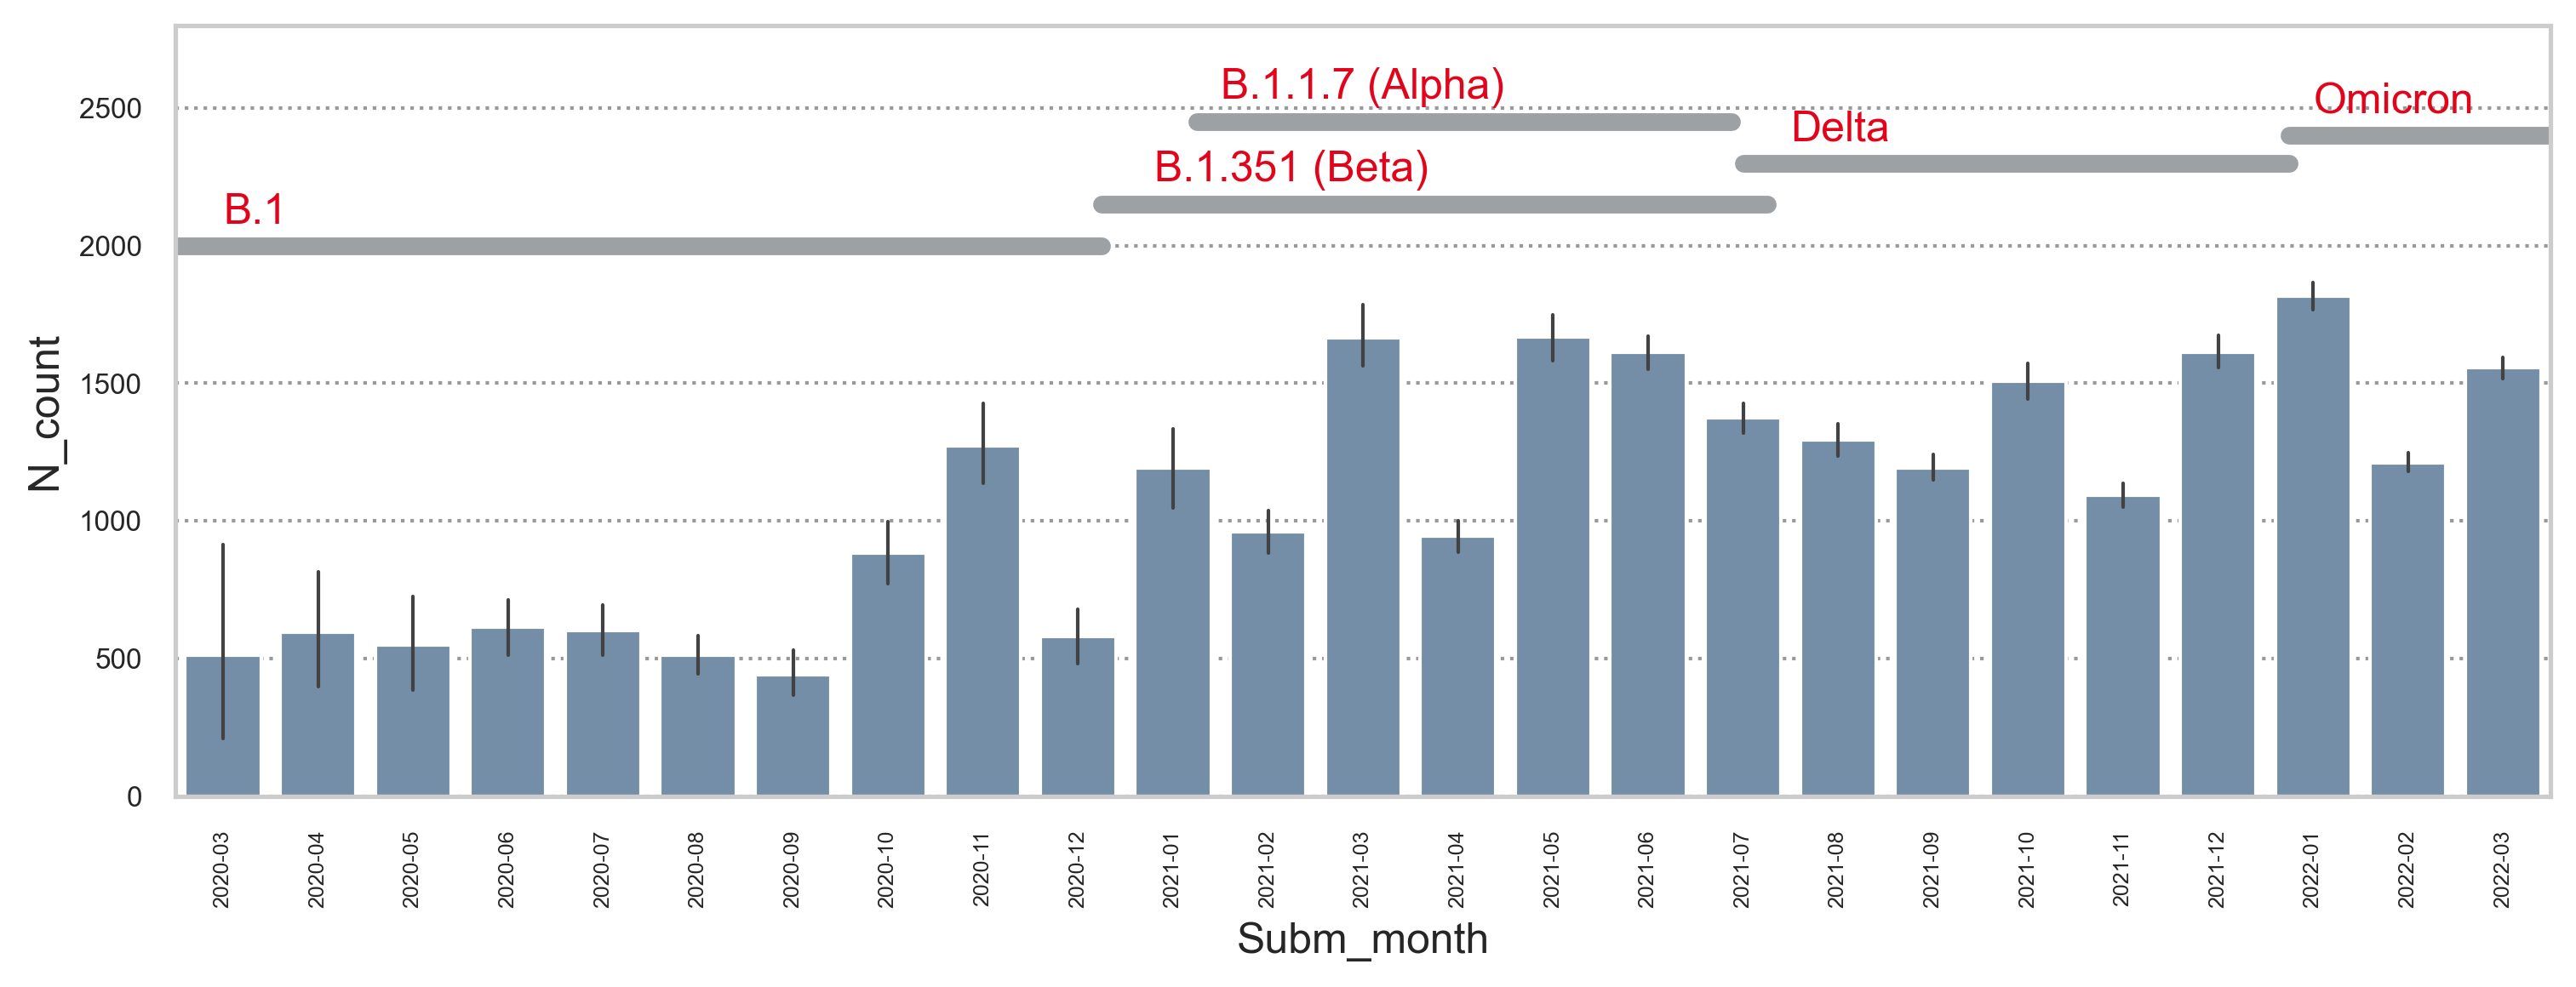

In [9]:
sns.set(rc={"figure.figsize":(12, 4)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.barplot(data=df1, x="Subm_month", y="N_count", errwidth=1,order = month_order, color = "#6b8eae")
ax.set_ylim(0, 2800)

#Annotate
ax.text(0, 2050, "B.1", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2000, xmin=0, xmax=0.39, linewidth=5, color="#9ea1a3",linestyle='-')

ax.text(9.8, 2200, "B.1.351 (Beta)", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2150, xmin=0.39, xmax=0.67, linewidth=5, color="#9ea1a3",linestyle='-')

ax.text(16.5, 2350, "Delta", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2300, xmin=0.66, xmax=0.89, linewidth=5, color="#9ea1a3",linestyle='-')

ax.text(22, 2450, "Omicron", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2400, xmin=0.89, xmax=1, linewidth=5, color="#9ea1a3",linestyle='-')

ax.text(10.5, 2500, "B.1.1.7 (Alpha)", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2450, xmin=0.43, xmax=0.655, linewidth=5, color="#9ea1a3",linestyle='-')

plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=8)
plt.savefig(outprefix+'_Nmean_by_subm_month.pdf',bbox_inches="tight")
plt.savefig(outprefix+'_Nmean_by_subm_month.jpg',bbox_inches="tight", dpi= 300)

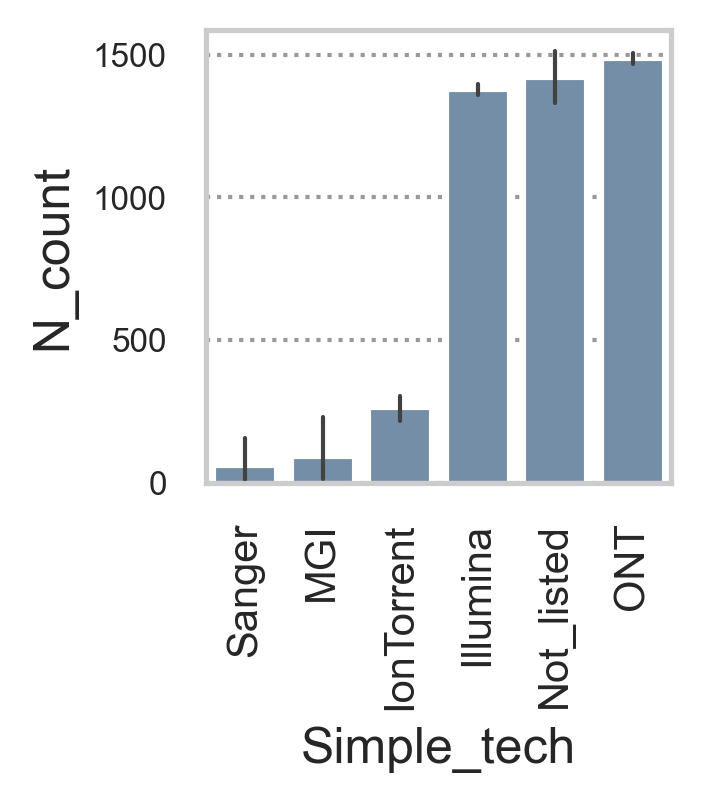

In [10]:
tech_order = ['Sanger', 'MGI', 'IonTorrent', 'Illumina', 'Not_listed', 'ONT']
# tech_order = [ 'Illumina','ONT']
sns.set(rc={"figure.figsize":(2, 2)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

ax.set_ylim(0, 1800)
ax = sns.barplot(data=df1, x="Simple_tech", y="N_count", color = "#6b8eae", errwidth=1, order = tech_order)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=8)
plt.savefig(outprefix+'_Nmean_by_tech.pdf',bbox_inches="tight")
plt.savefig(outprefix+'_Nmean_by_tech.jpg',bbox_inches="tight", dpi= 300)

In [11]:
df1['Primers_used'].value_counts()

Not_listed     101234
ARTIC_V3         9120
ARTIC_V2         2309
Entebbe           713
Midnight          382
IT_AmpliSeq       261
AviSeq            139
Hexamers           90
Name: Primers_used, dtype: int64

In [12]:
primer_order = ['AviSeq','Hexamers','Entebbe','ARTIC_V2','IT_AmpliSeq','Midnight','Not_listed','ARTIC_V3']
                

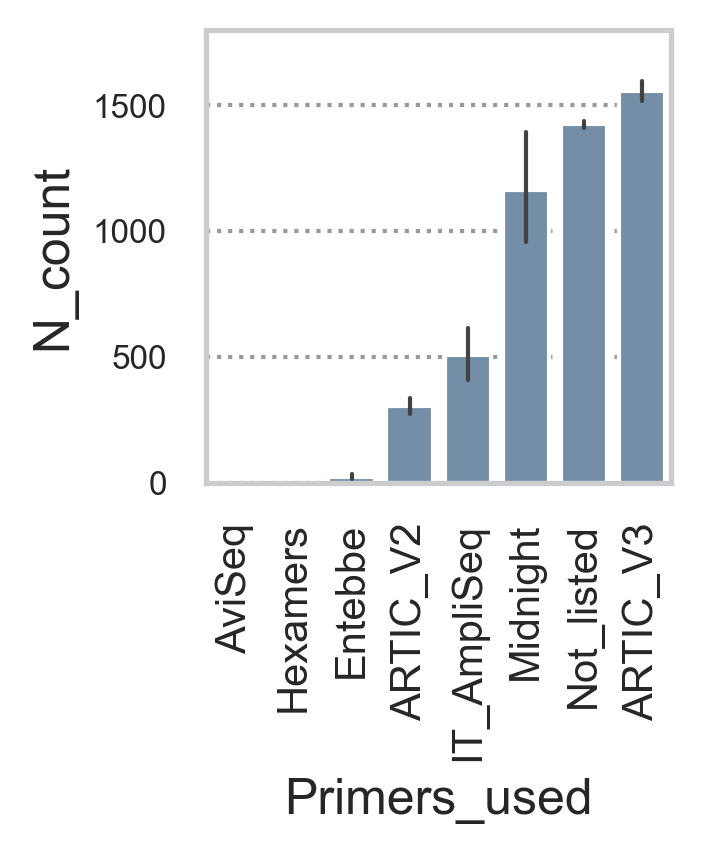

In [13]:
sns.set(rc={"figure.figsize":(2, 2)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.barplot(data=df1, x="Primers_used", y="N_count", color = "#6b8eae", errwidth=1, order = primer_order)

ax.set_ylim(0, 1800)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=8)
plt.savefig(outprefix+'_Nmean_by_primers.pdf',bbox_inches="tight")
plt.savefig(outprefix+'_Nmean_by_primers.jpg',bbox_inches="tight", dpi= 300)

In [14]:
df1['Country'].value_counts()

SouthAfrica                     41221
Reunion                         12543
Kenya                            9667
Nigeria                          6466
Senegal                          3864
Ghana                            3581
Botswana                         3532
Egypt                            2396
Mauritius                        2203
DemocraticRepublicoftheCongo     1656
Zambia                           1630
Namibia                          1615
Seychelles                       1353
Gambia                           1314
Tunisia                          1252
Angola                           1204
Malawi                           1203
Mozambique                       1157
Cameroon                          994
Mayotte                           979
Gabon                             958
Zimbabwe                          933
Rwanda                            916
Eswatini                          887
Benin                             879
Morocco                           835
Togo        

In [15]:
df4 = df1.groupby('Country').agg({'N_count': ['mean','median','min','max']})
# need to flatten columns
df5 = (df4.droplevel(0,axis=1))
df5["Country"]= df5.index
df5_ordered = df5.sort_values(by=['mean'], ascending=[True])
country_order = list(df5_ordered["Country"])
country_order

['Mauritania',
 'SouthSudan',
 'Burundi',
 'Uganda_WT',
 'Mayotte',
 'Mali',
 'Djibouti',
 'Morocco',
 'Reunion',
 'SaoTomeandPrincipe',
 'Libya',
 'Gabon',
 'Coted’Ivoire',
 'Madagascar',
 'SierraLeone',
 'Liberia',
 'Tunisia',
 'CaboVerde',
 'Ethiopia',
 'Mozambique',
 'Togo',
 'Guinea-Bissau',
 'EquatorialGuinea',
 'Benin',
 'Algeria',
 'Rwanda',
 'Mauritius',
 'Namibia',
 'Tanzania',
 'SouthAfrica',
 'Chad',
 'Cameroon',
 'Lesotho',
 'Kenya',
 'Comoros',
 'RepublicoftheCongo',
 'Malawi',
 'Zimbabwe',
 'Angola',
 'Guinea',
 'Ghana',
 'Zambia',
 'DemocraticRepublicoftheCongo',
 'CentralAfricanRepublic',
 'Eswatini',
 'Botswana',
 'Uganda',
 'Gambia',
 'Seychelles',
 'Nigeria',
 'Somalia',
 'Sudan',
 'Senegal',
 'Niger',
 'Egypt',
 'BurkinaFaso']

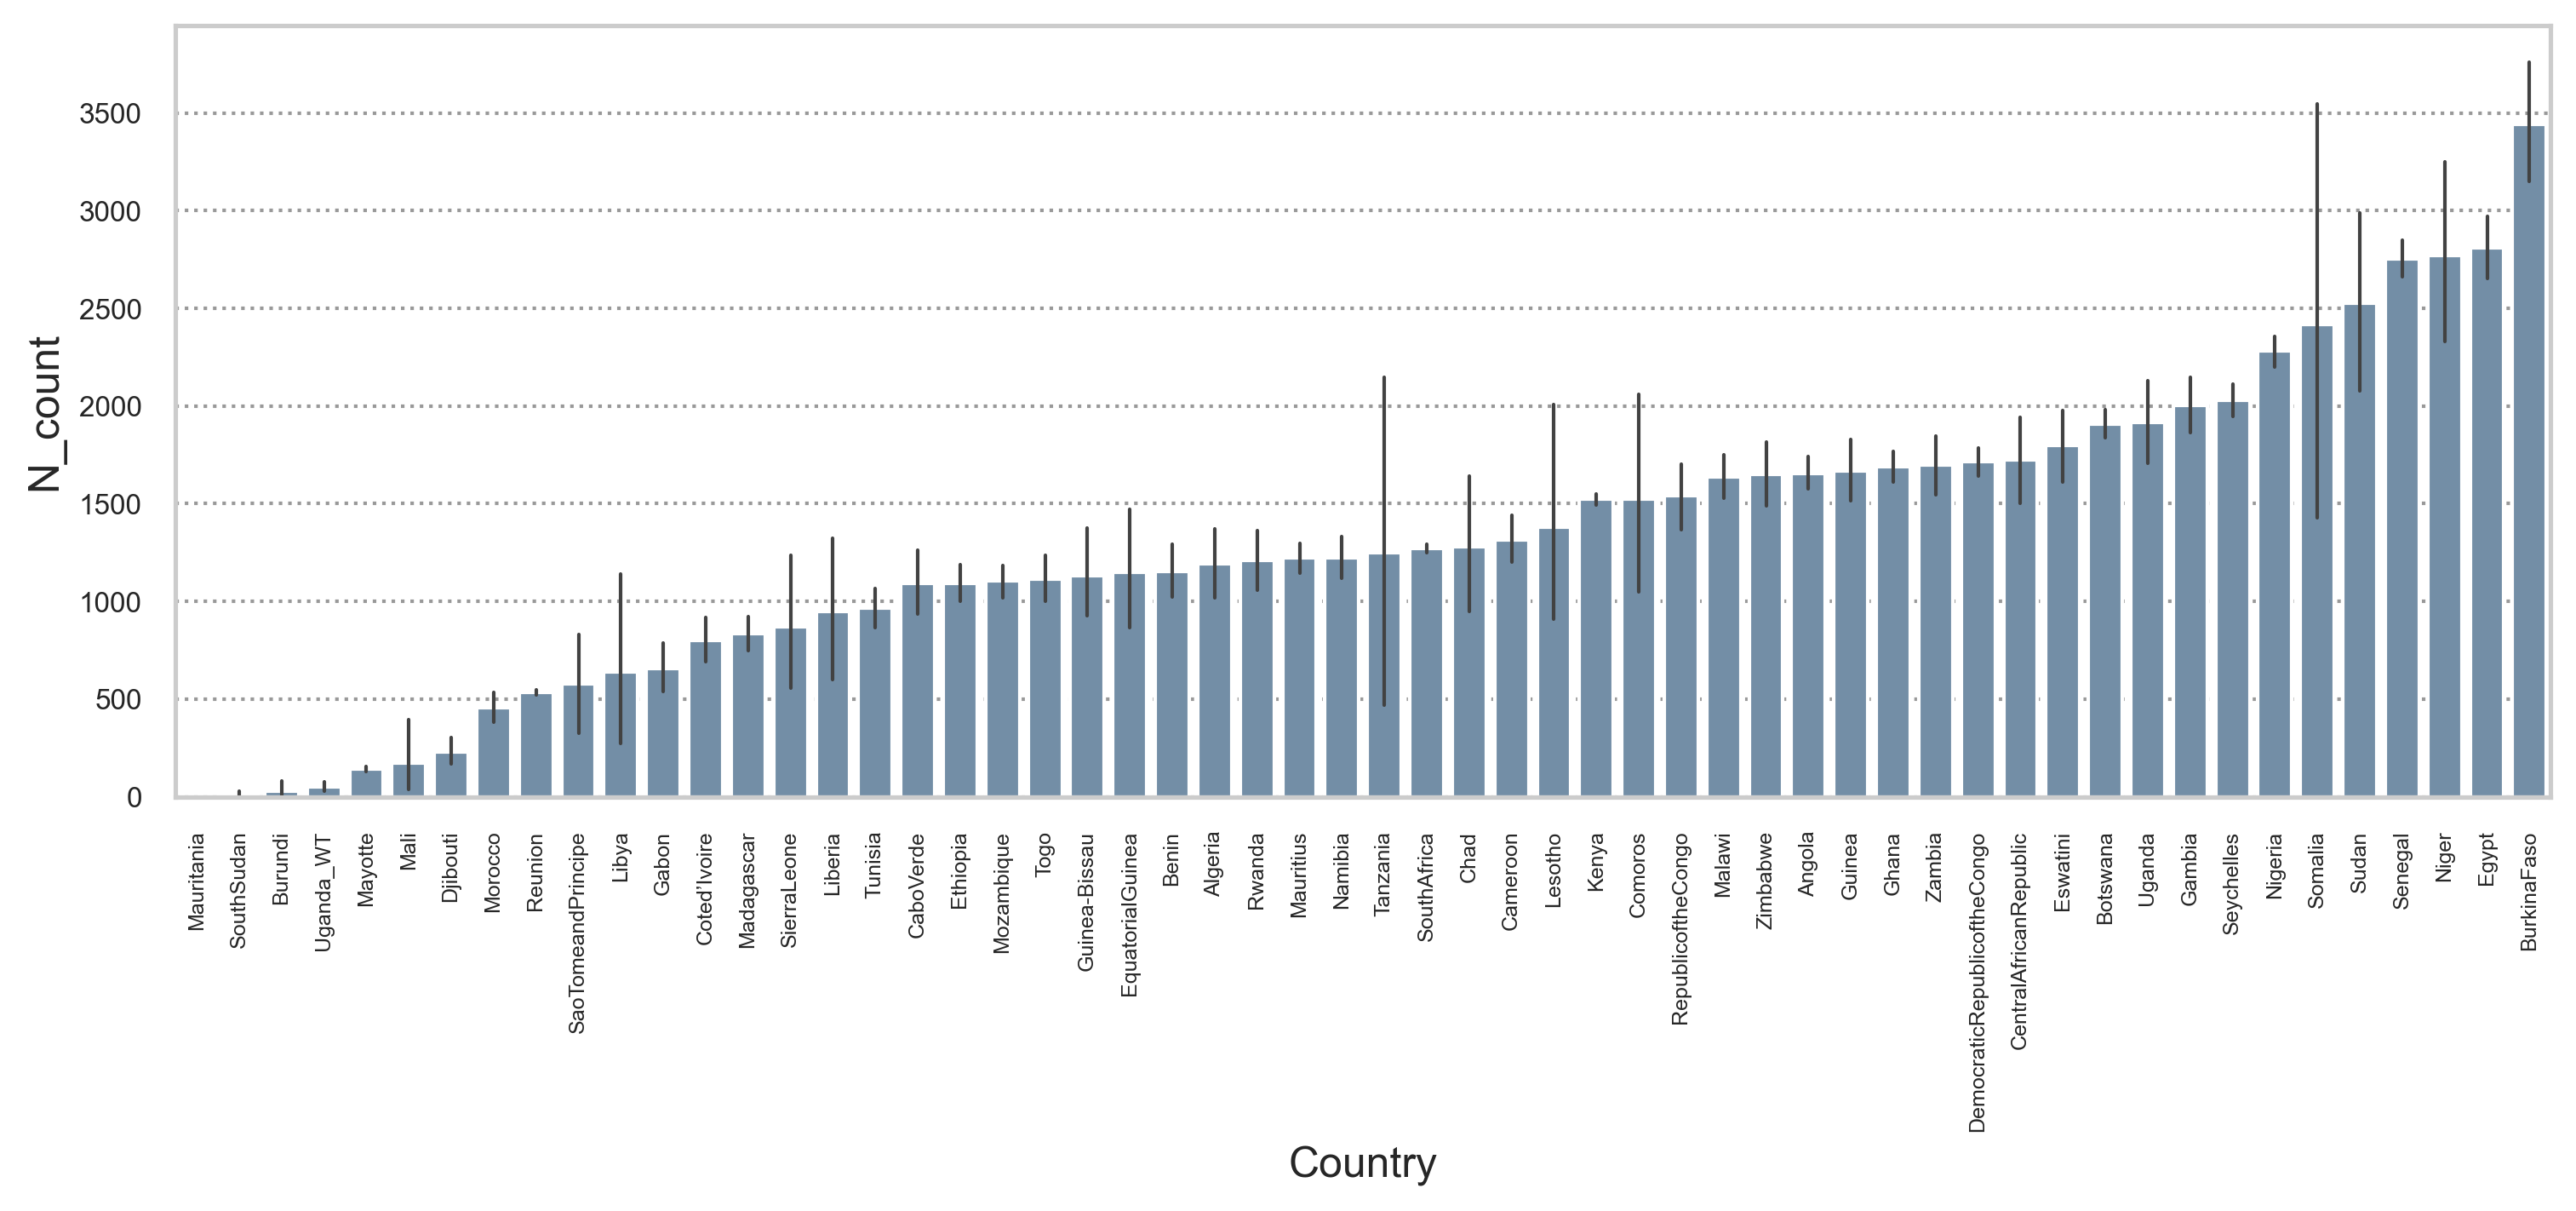

In [16]:
sns.set(rc={"figure.figsize":(12, 4)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.barplot(data=df1, x="Country", y="N_count", color = "#6b8eae", errwidth = 1, order = country_order)
plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=8)
plt.savefig(outprefix+'_Nmean_by_country.pdf',bbox_inches="tight")
plt.savefig(outprefix+'_Nmean_by_country.jpg',bbox_inches="tight", dpi= 300)

In [17]:
lineage_count_dict = (df1['Lineage'].value_counts()).to_dict()
# lineage_count_dict
lineage_count_dict_gre300 = {k:v for (k,v) in lineage_count_dict.items() if v >= 300}
lineage_count_gre300_list = list(lineage_count_dict_gre300.keys())


In [18]:
#need mean N count per lineage
df9 = df1.groupby('Lineage').agg({'N_count': ['mean','median','min','max']})
# need to flatten columns
df10 = (df9.droplevel(0,axis=1))
df10['Lineage']= df10.index
# retain only Lineages gre300
df10_gre300 =(df10[df10["Lineage"].isin(lineage_count_gre300_list)]).sort_values(by='mean', ascending=False)
df10_gre300

lineage_gre300_N_content_order = df10_gre300["Lineage"].tolist()

In [19]:
lineage_gre300_N_content_order = df10_gre300["Lineage"].tolist()
lineage_gre300_N_content_order

['Unassigned',
 'B.1.617.2',
 'B.1.1',
 'B.1.1.420',
 'B.1',
 'B.1.620',
 'B.1.351',
 'A.27',
 'AY.36',
 'AY.34.1',
 'BA.1.1.1',
 'BA.1.15',
 'BA.1.1',
 'AY.88',
 'BA.1.14',
 'AY.120',
 'AY.122',
 'C.1',
 'AY.16',
 'B.1.525',
 'AY.116',
 'AY.34',
 'C.1.2',
 'B.1.1.318',
 'BA.1',
 'B.1.1.448',
 'AY.46',
 'BA.1.18',
 'BA.1.17.2',
 'AY.109',
 'AY.45',
 'B.1.1.7',
 'BA.2',
 'BA.1.17',
 'AY.38',
 'BA.1.21',
 'B.1.1.54',
 'AY.91',
 'AY.6',
 'AY.99',
 'B.1.416',
 'AY.32',
 'A.23.1',
 'BA.4',
 'AY.120.2',
 'BA.5',
 'AZ.5',
 'AY.33.1',
 'AY.43',
 'B.1.351.2',
 'AY.40']

In [20]:
# retain only lineages gre300 in original dataframe df1
df1_gre300 = df1[df1['Lineage'].isin(lineage_count_gre300_list)]
df1_gre300.head()

,genome_id,N_count,Lineage,Submission_date,Subm_month,Country,Epidem_month,Technology,Simple_tech,Primers_used
2,EPI_ISL_2424136|Gabon|2021-02-09|2021-06-05|CE...,751,B.1.351,2021-06-05,2021-06,Gabon,16,NanoporeMinION,ONT,Not_listed
3,EPI_ISL_2424137|Gabon|2021-02-09|2021-06-05|CE...,615,B.1.1.7,2021-06-05,2021-06,Gabon,16,NanoporeMinION,ONT,Not_listed
4,EPI_ISL_2424138|Gabon|2021-02-19|2021-06-05|CE...,955,B.1.1.7,2021-06-05,2021-06,Gabon,16,NanoporeMinION,ONT,Not_listed
5,EPI_ISL_2424139|Gabon|2021-03-25|2021-06-05|CE...,2,B.1.1.7,2021-06-05,2021-06,Gabon,16,NanoporeMinION,ONT,Not_listed
6,EPI_ISL_2424157|Gabon|2021-04-08|2021-06-05|CE...,35,B.1,2021-06-05,2021-06,Gabon,16,NanoporeMinION,ONT,Not_listed


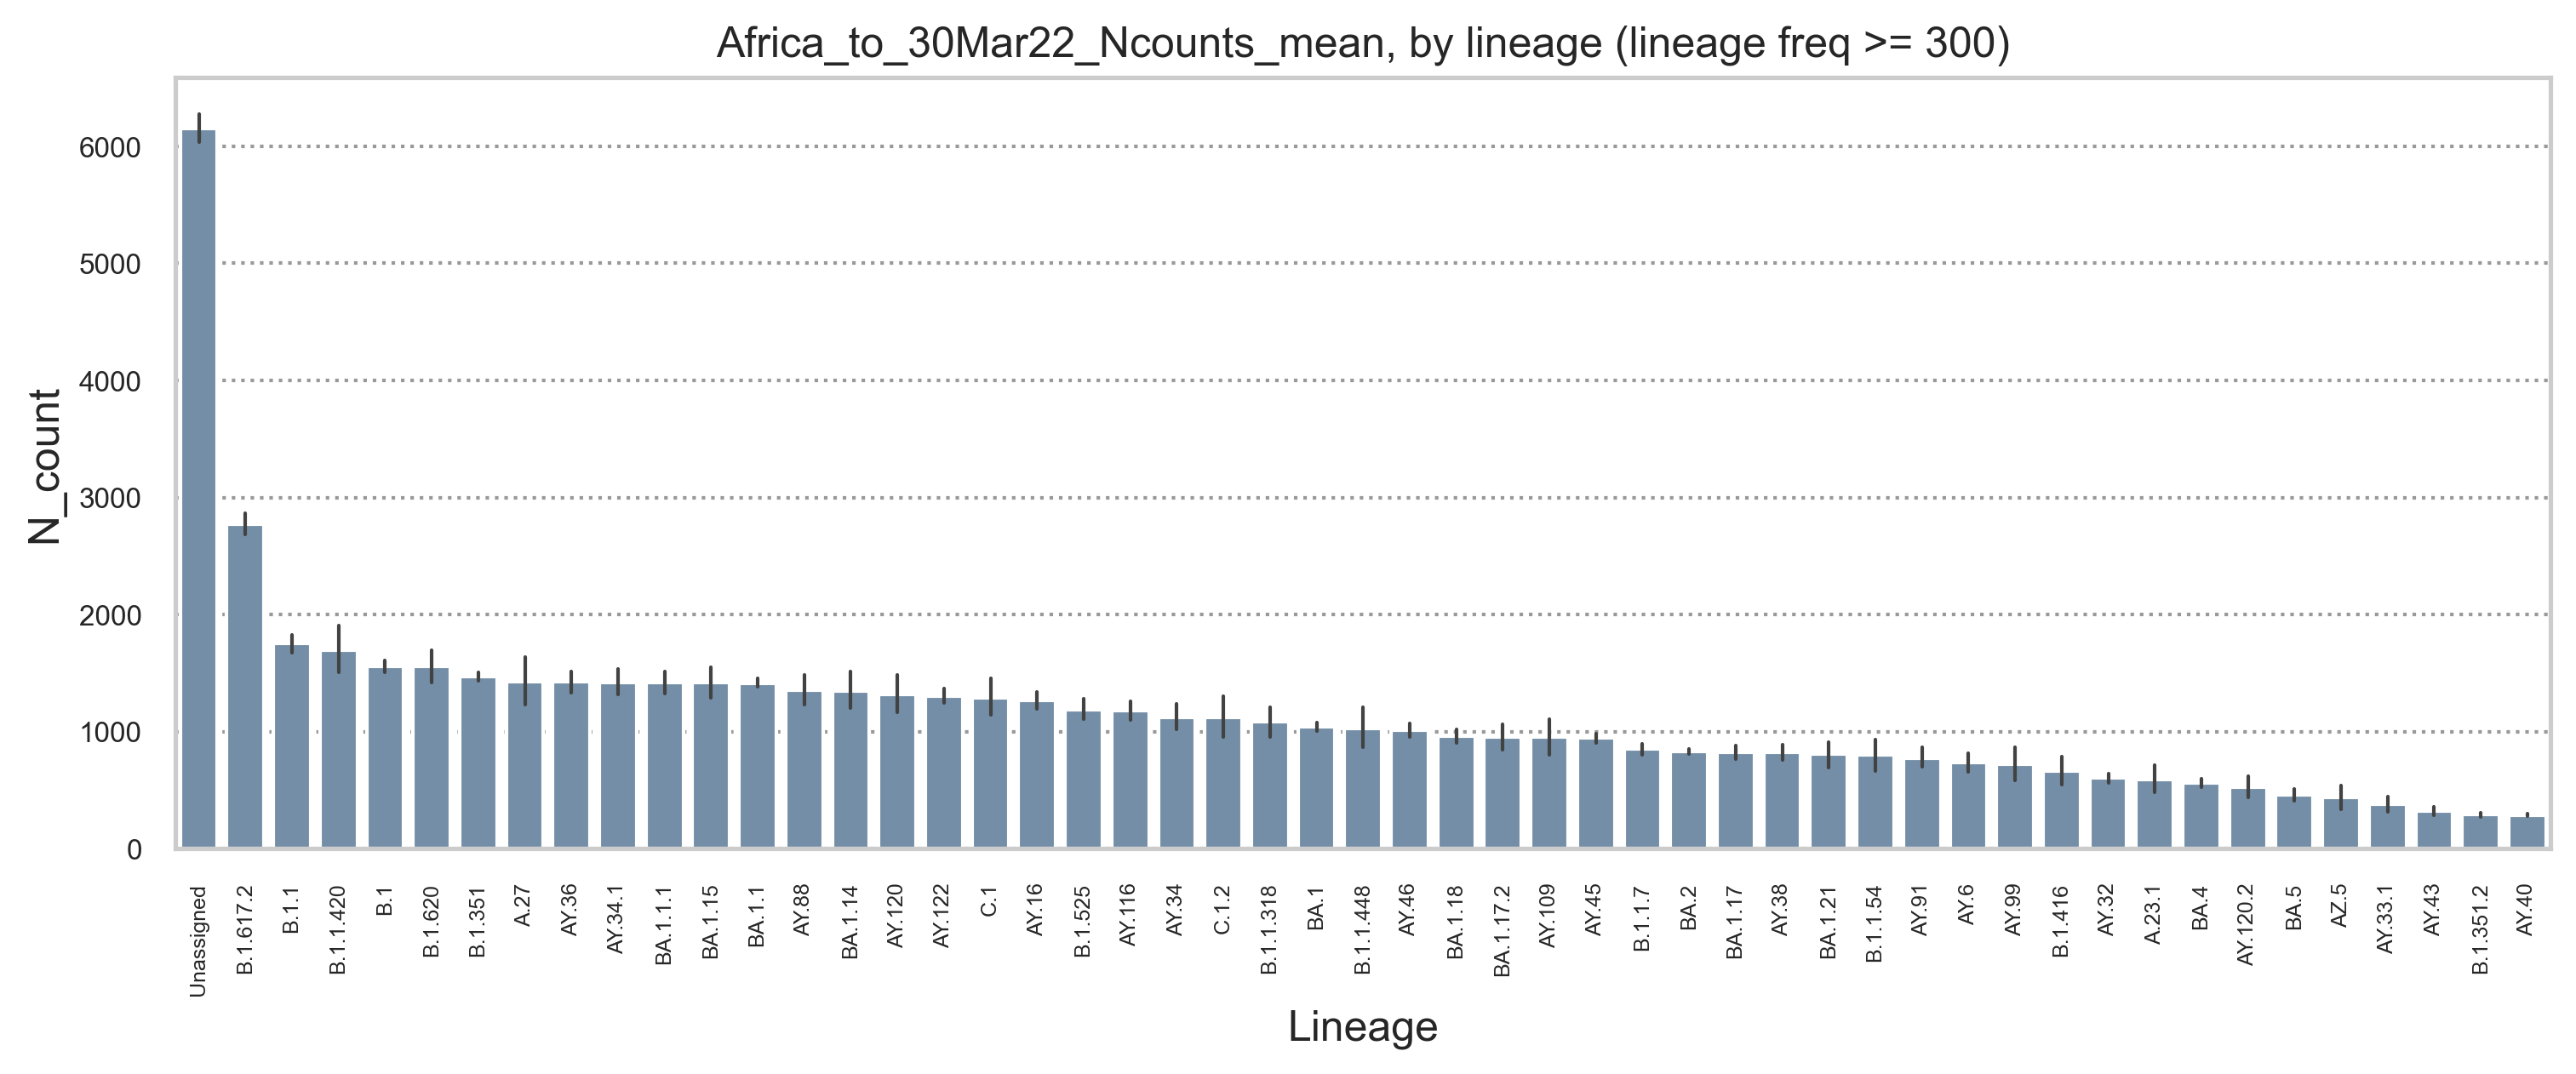

In [21]:
sns.set(rc={"figure.figsize":(12, 4)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

ax = sns.barplot(data=df1_gre300, x="Lineage", y="N_count", color = "#6b8eae", errwidth=1, order = lineage_gre300_N_content_order)

plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=8)
plt.title(outprefix+'_mean, by lineage (lineage freq >= 300)')
plt.savefig(outprefix+'_Nmean_by_lineage_gre300.pdf',bbox_inches="tight")
plt.savefig(outprefix+'_Nmean_by_lineage_gre300.jpg',bbox_inches="tight", dpi= 300)

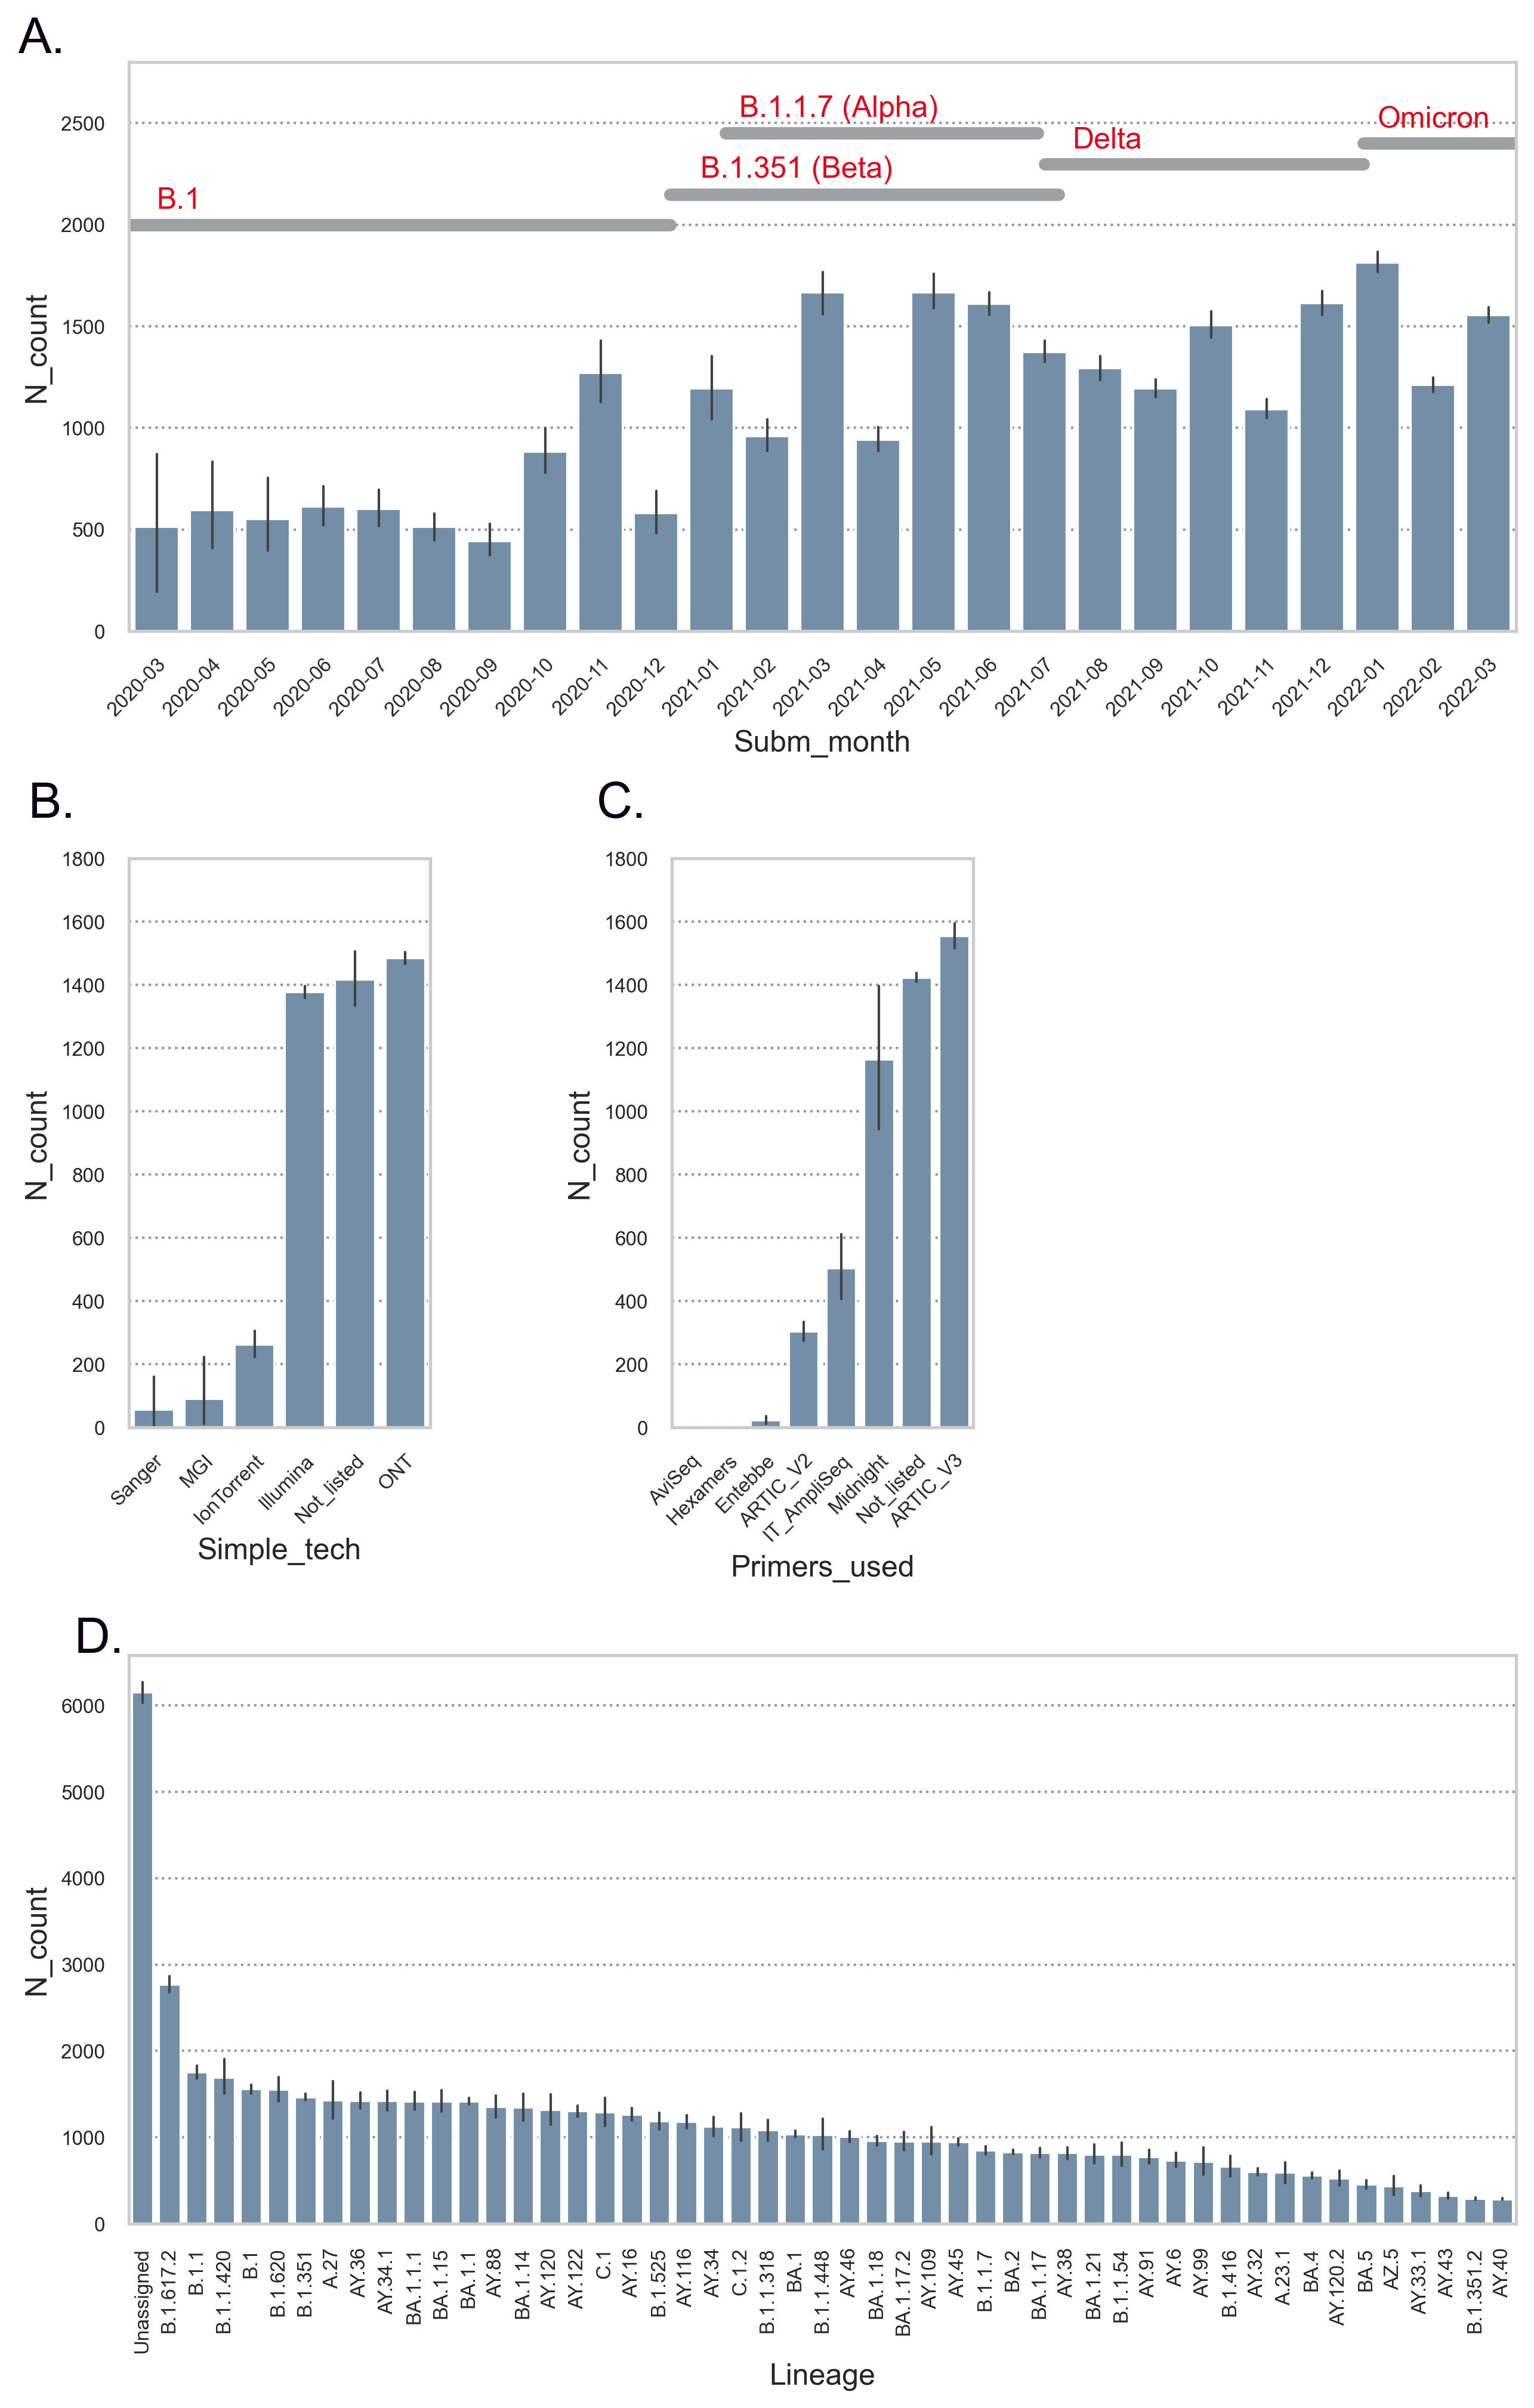

In [22]:
#multipanel complete figure
# put four panels on one graph 
# sns.set(style="whitegrid")
# sns.set(rc={"figure.figsize":(16, 16)}) #width=3, #height=4
fig = plt.figure(figsize=(10,16))
fig.subplots_adjust(hspace=0.4, wspace=0.8)

ax = fig.add_subplot(3, 1, 1)
# sns.set(rc={"figure.figsize":(10, 20)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.barplot(data=df1, x="Subm_month", y="N_count", errwidth=1,order = month_order, color = "#6b8eae")
ax.set_ylim(0, 2800)

#Annotate
ax.text(0, 2050, "B.1", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2000, xmin=0, xmax=0.39, linewidth=5, color="#9ea1a3",linestyle='-')

ax.text(9.8, 2200, "B.1.351 (Beta)", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2150, xmin=0.39, xmax=0.67, linewidth=5, color="#9ea1a3",linestyle='-')

ax.text(16.5, 2350, "Delta", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2300, xmin=0.66, xmax=0.89, linewidth=5, color="#9ea1a3",linestyle='-')

ax.text(22, 2450, "Omicron", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2400, xmin=0.89, xmax=1, linewidth=5, color="#9ea1a3",linestyle='-')

ax.text(10.5, 2500, "B.1.1.7 (Alpha)", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2450, xmin=0.43, xmax=0.655, linewidth=5, color="#9ea1a3",linestyle='-')

#add letter for figure panel
ax.text(-2.5, 2800, "A.", fontsize=20, va="bottom", color="#0d0015", rotation=0)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=8)
plt.yticks(fontsize=8)

# plt.savefig(outprefix+'_Nmean_by_subm_month.pdf',bbox_inches="tight")
# plt.savefig(outprefix+'_Nmean_by_subm_month.jpg',bbox_inches="tight", dpi= 300)


ax = fig.add_subplot(3, 3, 4)
tech_order = ['Sanger', 'MGI', 'IonTorrent', 'Illumina', 'Not_listed', 'ONT']
# tech_order = [ 'Illumina','ONT']
# sns.set(rc={"figure.figsize":(2, 2)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

ax.set_ylim(0, 1800)
ax = sns.barplot(data=df1, x="Simple_tech", y="N_count", color = "#6b8eae", errwidth=1, order = tech_order)

#add letter for figure panel
ax.text(-2.5, 1900, "B.", fontsize=20, va="bottom", color="#0d0015", rotation=0)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=8)
plt.yticks(fontsize=8)
# plt.savefig(outprefix+'_Nmean_by_tech.pdf',bbox_inches="tight")
# plt.savefig(outprefix+'_Nmean_by_tech.jpg',bbox_inches="tight", dpi= 300)


ax = fig.add_subplot(3, 3, 5)
# sns.set(rc={"figure.figsize":(2, 2)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.barplot(data=df1, x="Primers_used", y="N_count", color = "#6b8eae", errwidth=1, order = primer_order)
ax.set_ylim(0, 1800)

#add letter for figure panel
ax.text(-2.5, 1900, "C.", fontsize=20, va="bottom", color="#0d0015", rotation=0)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=8)
plt.yticks(fontsize=8)

ax = fig.add_subplot(3, 1, 3)

# sns.set(rc={"figure.figsize":(12, 4)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

ax = sns.barplot(data=df1_gre300, x="Lineage", y="N_count", color = "#6b8eae", errwidth=1, order = lineage_gre300_N_content_order)

#add letter for figure panel
ax.text(-2.5, 6500, "D.", fontsize=20, va="bottom", color="#0d0015", rotation=0)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
# plt.title(outprefix+'_mean, by lineage (lineage freq >= 300)')
# plt.savefig(outprefix+'_Nmean_by_lineage_gre300.pdf',bbox_inches="tight")
# plt.savefig(outprefix+'_Nmean_by_lineage_gre300.jpg',bbox_inches="tight", dpi= 300)


plt.savefig(outprefix+'_by_month_tech_primers_lineage.pdf',bbox_inches="tight")
plt.savefig(outprefix+'_by_month_tech_primers_lineage.jpg',bbox_inches="tight", dpi= 300)
